In [66]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [7]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [8]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


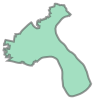

In [9]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


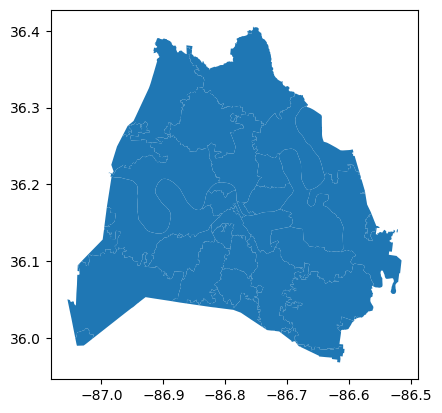

In [6]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


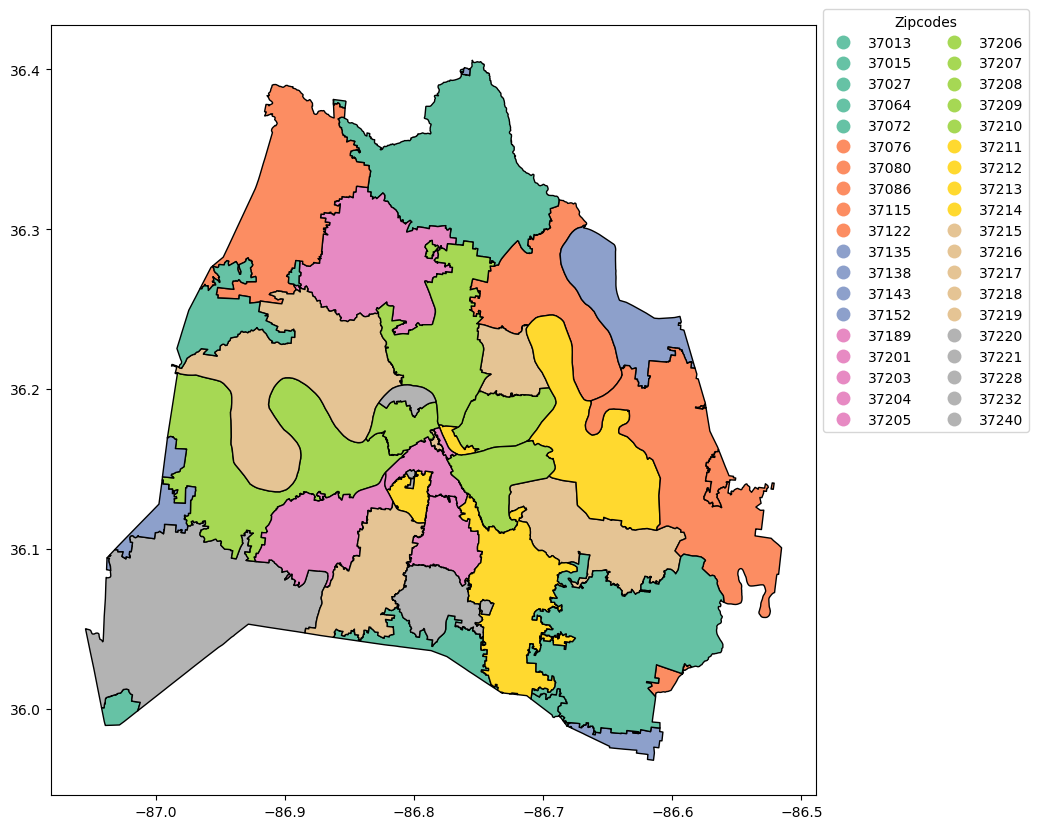

In [7]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [11]:
beer_permits = pd.read_csv('../data/Beer_Permit_Locations_Feature_Layer_view.csv')
print(beer_permits.shape)
beer_permits.head(3)

(2032, 21)


,OBJECTID,Permit #,Status,Permit Type,Permit SubType,Permit SubType Description,Date Entered,Date Issued,Parcel,Business Name,...,Address,City,State,Zip Code,Council District,Census Tract,Lon,Lat,x,y
0,1,21-27149,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/1/2021 5:00:00 AM,7/29/2021 5:00:00 AM,10308006000,"LOLA NASHVILLE, LLC",...,4401 MURPHY RD,NASHVILLE,TN,37209.0,24,37013400,-86.839203,36.140724,-86.839203,36.140724
1,2,21-27151,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,4/2/2021 5:00:00 AM,7/29/2021 5:00:00 AM,07207029200,BITE A BIT THAI SUSHI,...,1402 MCGAVOCK PIKE,NASHVILLE,TN,37216.0,7,37011500,-86.723963,36.204799,-86.723963,36.204799
2,3,21-27153,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/5/2021 5:00:00 AM,9/15/2022 5:00:00 AM,13314008900,404 BAR & GRILL,...,404 ELYSIAN FIELDS RD,NASHVILLE,TN,37211.0,26,37018901,-86.731159,36.086771,-86.731159,36.086771


In [12]:
beer_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    2032 non-null   int64  
 1   Permit #                    2032 non-null   object 
 2   Status                      2032 non-null   object 
 3   Permit Type                 2032 non-null   object 
 4   Permit SubType              2032 non-null   object 
 5   Permit SubType Description  2032 non-null   object 
 6   Date Entered                2032 non-null   object 
 7   Date Issued                 1980 non-null   object 
 8   Parcel                      2032 non-null   object 
 9   Business Name               2031 non-null   object 
 10  Business Owner              1037 non-null   object 
 11  Address                     2032 non-null   object 
 12  City                        2032 non-null   object 
 13  State                       2032 

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [10]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [14]:
beer_geo = gpd.GeoDataFrame(beer_permits, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(beer_permits.Lon, beer_permits.Lat))

In [15]:
type(beer_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [16]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [17]:
perms_by_zip = gpd.sjoin(beer_geo, zipcodes, predicate = 'within')

In [18]:
perms_by_zip.head()

,OBJECTID,Permit #,Status,Permit Type,Permit SubType,Permit SubType Description,Date Entered,Date Issued,Parcel,Business Name,...,Council District,Census Tract,Lon,Lat,x,y,geometry,index_right,zip,po_name
0,1,21-27149,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/1/2021 5:00:00 AM,7/29/2021 5:00:00 AM,10308006000,"LOLA NASHVILLE, LLC",...,24,37013400,-86.839203,36.140724,-86.839203,36.140724,POINT (-86.83920 36.14072),12,37209,NASHVILLE
1,2,21-27151,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,4/2/2021 5:00:00 AM,7/29/2021 5:00:00 AM,07207029200,BITE A BIT THAI SUSHI,...,7,37011500,-86.723963,36.204799,-86.723963,36.204799,POINT (-86.72396 36.20480),1,37216,NASHVILLE
2,3,21-27153,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/5/2021 5:00:00 AM,9/15/2022 5:00:00 AM,13314008900,404 BAR & GRILL,...,26,37018901,-86.731159,36.086771,-86.731159,36.086771,POINT (-86.73116 36.08677),49,37211,NASHVILLE
3,4,21-27157,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/9/2021 5:00:00 AM,6/10/2021 5:00:00 AM,093130C80100CO,SUNDA NEW ASIAN,...,19,37019500,-86.784013,36.151893,-86.784013,36.151893,POINT (-86.78401 36.15189),35,37203,NASHVILLE
4,5,21-27171,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,4/14/2021 5:00:00 AM,1/13/2022 6:00:00 AM,09109003200,TEE LINE CURLING & BOWLING CENTER,...,20,37013202,-86.867446,36.157813,-86.867446,36.157813,POINT (-86.86745 36.15781),12,37209,NASHVILLE


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [20]:
perms_by_zip['zip'].value_counts()

zip
37203    308
37214    215
37211    170
37209    143
37206    128
37013    101
37201     97
37207     91
37115     79
37217     74
37076     66
37221     66
37208     61
37210     50
37204     46
37215     46
37216     46
37219     41
37212     38
37205     37
37138     28
37027     26
37218     22
37080     13
37213     10
37228      8
37189      7
37072      7
37220      2
37135      2
37240      2
37086      1
37232      1
Name: count, dtype: int64

###### Let's take a closer look at the 272 bus stops in the 37206 zip code
- filter the stops_by_zip data to just get bus stops in 37206
- filter the zip code geodataframe to just the polygon (row) for 37206


In [22]:
perms_in_37206 = perms_by_zip.loc[perms_by_zip['zip'] == '37206']
perms_in_37206.shape

(128, 25)

In [23]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37206 and make them light green
- next plot the points for the beer perms and color them by route

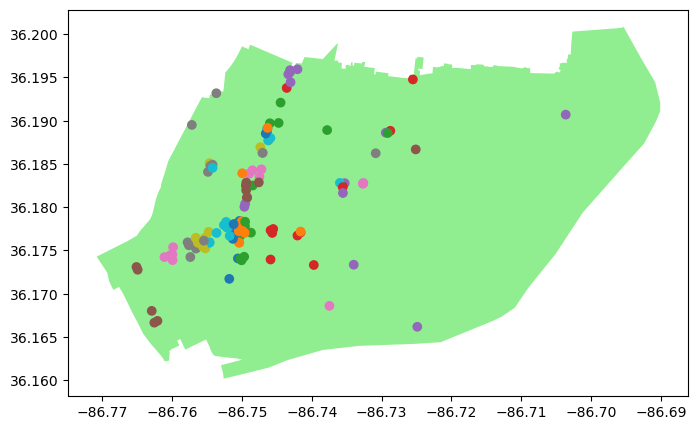

In [24]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
perms_in_37206.plot( ax = ax, column = 'Address');
plt.show();

In [29]:
perms_in_37209 = perms_by_zip.loc[perms_by_zip['zip'] == '37209']
perms_in_37209.shape

(143, 25)

In [31]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

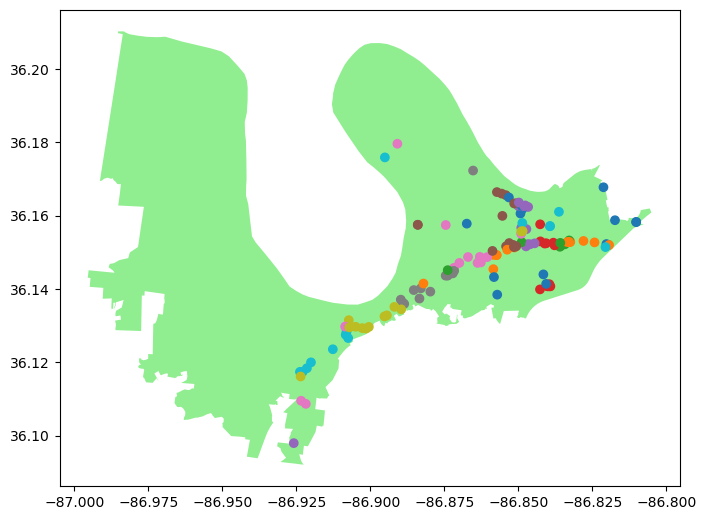

In [32]:
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
perms_in_37209.plot( ax = ax, column = 'Address');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [25]:
polygon37206.geometry.centroid

/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_59358/4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


13    POINT (-86.73098 36.18090)
dtype: geometry

In [33]:
polygon37209.geometry.centroid

/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_59358/283130122.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid


12    POINT (-86.91816 36.15605)
dtype: geometry

In [39]:
#find the center of the larger (more southern) polygon and look at it
center1 = polygon37206.geometry.centroid[13]
print(center1)

POINT (-86.7309830626016 36.18089690922079)


/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_59358/772888674.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center1 = polygon37206.geometry.centroid[13]


In [38]:
center2 = polygon37209.geometry.centroid[12]
print(center2)

POINT (-86.91816342256455 36.15604558838379)


/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_59358/3411359884.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center2 = polygon37209.geometry.centroid[12]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [40]:
# reverse the order when constructing the array for folium location
area_center1 = [center1.y, center1.x]

# check the order of area_center, the location for our folium map
print(area_center1)

[36.18089690922079, -86.7309830626016]


In [44]:
area_center2 = [center2.y, center2.x]
print(area_center2)

[36.15604558838379, -86.91816342256455]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [41]:
#create our map of Nashville Zip Code 37207 and show it
map_37206 = folium.Map(location =  area_center1, zoom_start = 12)
map_37206

In [45]:
map_37209 = folium.Map(location =  area_center2, zoom_start = 12)
map_37209

#### Next, let's add our 37206 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [42]:
i = 0
for row_index, row_values in perms_in_37206.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 11
values are:
 
OBJECTID                                                    12
Permit #                                              21-27200
Status                                                  ISSUED
Permit Type                                           BBPERMIT
Permit SubType                                      ONOFFSALES
Permit SubType Description            BB - On & Off Site Sales
Date Entered                              4/26/2021 5:00:00 AM
Date Issued                               6/10/2021 5:00:00 AM
Parcel                                             08309017500
Business Name                              VAN GOGH'S WINE BAR
Business Owner                                             NaN
Address                                    1112  WOODLAND ST  
City                                                 NASHVILLE
State                                                       TN
Zip Code                                               37206.0
Council District             

In [46]:
i = 0
for row_index, row_values in perms_in_37209.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
OBJECTID                                                    1
Permit #                                             21-27149
Status                                                 ISSUED
Permit Type                                          BBPERMIT
Permit SubType                                        ONSALES
Permit SubType Description                 BB - On Site Sales
Date Entered                              4/1/2021 5:00:00 AM
Date Issued                              7/29/2021 5:00:00 AM
Parcel                                            10308006000
Business Name                             LOLA NASHVILLE, LLC
Business Owner                                            NaN
Address                                     4401  MURPHY RD  
City                                                NASHVILLE
State                                                      TN
Zip Code                                              37209.0
Council District                             

#### Create map_37206 again with additional features:
- add the zipcode area outline (polygon_37206)
- iterate through the stops_in_37206 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37206`
- display `map_37206`

In [53]:
#draw our zip code area: 37207
map_37206 = folium.Map(location =  area_center1, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in perms_in_37206.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="droplet", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37206)
map_37206.save('../maps/map37206.html')

#display our map
map_37206

In [52]:
map_37209 = folium.Map(location =  area_center2, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)

for row_index, row_values in perms_in_37209.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="droplet", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37209)
map_37209.save('../maps/map37209.html')

#display our map
map_37209

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [26]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [55]:
cluster_map_37206 = folium.Map(location =  area_center1, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37206)

folium.GeoJson(polygon37206).add_to(cluster_map_37206)

# inside the loop add each marker to the cluster
for row_index, row_values in perms_in_37206.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="droplet", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37206.save('../maps/cluster37206.html')

cluster_map_37206  

In [61]:
cluster_map_37209 = folium.Map(location =  area_center2, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37209)

folium.GeoJson(polygon37209).add_to(cluster_map_37209)

# inside the loop add each marker to the cluster
for row_index, row_values in perms_in_37209.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="droplet", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37209.save('../maps/cluster37209.html')

cluster_map_37209

In [58]:
#draw our zip code area: 37207
map_37206 = folium.Map(location =  area_center1, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#create a list of locations and pass them to FastMarkerCluster()
locations = perms_in_37206[['Lat', 'Lon']].values.tolist()
map_37206.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37206

In [59]:
map_37209 = folium.Map(location =  area_center2, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)

#create a list of locations and pass them to FastMarkerCluster()
locations = perms_in_37209[['Lat', 'Lon']].values.tolist()
map_37209.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37209

In [67]:
merged_map = gpd.merge(map_37206, map_37209, on='Address')
merged_map

AttributeError: module 'geopandas' has no attribute 'merge'